# ME21B174 ASSIGNMENT 5 SUBMISSION

# TASK 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Importing dataset

In [2]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
nursery = fetch_ucirepo(id=76) 
# data (as pandas dataframes) 
X = nursery.data.features 
y = nursery.data.targets

In [3]:
# Converting 'spec_prior' and 'very_recom' to 'recommend' class to make a 3 class problem
y = y.replace({'spec_prior': 'recommend', 'very_recom' : 'recommend'})

In [4]:
# Label Encoding for both X and y
label_encoder = LabelEncoder()
y_label = label_encoder.fit_transform(y)
X_label = pd.DataFrame()
for i in X.columns:
    X_label[i] = label_encoder.fit_transform(X[i])

c:\Users\sakth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 1. Decision Tree ( categorical features ) 

Here I have used label encoding for both x and y. In other models, I have used one hot encoding for X and label encoding for y.

In [5]:
# Decision Tree model
def decision_tree(X_train, y_train, X_val, y_val, X_test, y_test):
    param_grid_lr = {'max_depth': [1, 3, 5, 10]}
    best_model = None
    best_accuracy = 0
    for i in param_grid_lr['max_depth']:
        mdl_dtc = DecisionTreeClassifier(max_depth=i, random_state=int(100*i))
        mdl_dtc.fit(X_train, y_train)
        y_pred = mdl_dtc.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = mdl_dtc

    # Print the best model and its best accuracy
    y_pred = best_model.predict(X_test)
    test_accuracy = 100 * accuracy_score(y_test, y_pred)
    return test_accuracy

In [6]:
# Train/Val/Test Split (60/20/20) for label encoded form
X_train_full, X_test, y_train_full, y_test = train_test_split(X_label, y_label, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, stratify=y_train_full, random_state=42)

# Performance of test data
accuracy_dst_1 = decision_tree(X_train, y_train, X_val, y_val, X_test, y_test)
print(accuracy_dst_1)

96.6820987654321


In [7]:
# Preprocess data (one-hot encoding)
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

## 2. Decision Tree(categorical features in one-hot encoded form)

In [8]:
# Decision Tree (one-hot encoded form) model
def decision_tree_one_hot_encoded_form(X_train, y_train, X_val, y_val, X_test, y_test):
    param_grid_lr = {'max_depth': [1, 5, 10, 20, 30]}
    best_model = None
    best_accuracy = 0
    for i in param_grid_lr['max_depth']:
        mdl_dtc = DecisionTreeClassifier(max_depth=i, random_state=int(100*i))
        mdl_dtc.fit(X_train, y_train)
        y_val_pred = mdl_dtc.predict(X_val)
        accuracy = accuracy_score(y_val, y_val_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = mdl_dtc
    # Print the best model and its test accuracy
    y_pred = best_model.predict(X_test)
    test_accuracy = 100 * accuracy_score(y_test, y_pred)
    return test_accuracy

In [9]:
# Train/Val/Test Split (60/20/20) for (X is in one-hot) encoded form
X_train_full, X_test, y_train_full, y_test = train_test_split(X_encoded, y_label, test_size=0.2, stratify=y, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, stratify=y_train_full, random_state=40)

# Performance of test data
accuracy_dst_2 = decision_tree_one_hot_encoded_form(X_train, y_train, X_val, y_val, X_test, y_test)
print(accuracy_dst_2)

99.26697530864197


## 3. Logistic Regression with L1 regularizer

In [10]:
# Logistic regression model with L1 regularization
def logistic_regression_with_L1(X_train, y_train, X_val, y_val, X_test, y_test):
    param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
    best_model = None
    best_accuracy = 0
    for i in param_grid_lr['C']:
        mdl_lr = LogisticRegression(penalty='l2', solver='liblinear', C=i)
        mdl_lr.fit(X_train, y_train)
        y_pred = mdl_lr.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = mdl_lr

    # Print the best model and its test accuracy
    y_pred = best_model.predict(X_test)
    test_accuracy = 100 * accuracy_score(y_test, y_pred)
    return test_accuracy

In [11]:
# Train/Val/Test Split (60/20/20) for (X is in one-hot) encoded form
X_train_full, X_test, y_train_full, y_test = train_test_split(X_encoded, y_label, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, stratify=y_train_full, random_state=42)

# Performance of test data
accuracy_lr = logistic_regression_with_L1(X_train, y_train, X_val, y_val, X_test, y_test)
print(accuracy_lr)

91.62808641975309


## 4. k-Nearest Neighbors

In [12]:
# k-Nearest Neighbors model
def k_nearest_neighbors(X_train, y_train, X_val, y_val, X_test, y_test):
    param_grid_lr = {'k': [3, 5, 7, 9, 11]}
    best_model = None
    best_accuracy = 0
    for i in param_grid_lr['k']:
        mdl_knn = KNeighborsClassifier(n_neighbors=i)
        mdl_knn.fit(X_train, y_train)
        y_pred = mdl_knn.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = mdl_knn

    # Print the best model and its test accuracy
    y_pred = best_model.predict(X_test)
    test_accuracy = 100 * accuracy_score(y_test, y_pred)
    return test_accuracy

In [13]:
# Train/Val/Test Split (60/20/20) for (X is in one-hot) encoded form
X_train_full, X_test, y_train_full, y_test = train_test_split(X_encoded, y_label, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, stratify=y_train_full, random_state=42)

# Performance of test data
accuracy_knn = k_nearest_neighbors(X_train, y_train, X_val, y_val, X_test, y_test)
print(accuracy_knn)

95.25462962962963


## Performance of all 4 models calculated

In [14]:
print("Accuracy of Decision Tree model: ",accuracy_dst_1)
print("Accuracy of Decision Tree model with one-hot encoding: ",accuracy_dst_2)
print("Accuracy of Logistic Regression with L1 regularization model: ",accuracy_lr)
print("Accuracy of k-Nearest Neighbors model: ",accuracy_knn)


Accuracy of Decision Tree model:  96.6820987654321
Accuracy of Decision Tree model with one-hot encoding:  99.26697530864197
Accuracy of Logistic Regression with L1 regularization model:  91.62808641975309
Accuracy of k-Nearest Neighbors model:  95.25462962962963


To compute varaince and mean, I have repeated the task 5 times for each model and stored all the accuracies in a dictionary

In [15]:
# Creating a dictionary to store each values of accuracy for each model
accuracy = {'accuracy_dst_1': [], 'accuracy_dst_2': [], 'accuracy_lr_l1': [], 'accuracy_knn': []}
for i in range(5):
    # Data split in label encoded form
    X_train_full, X_test, y_train_full, y_test = train_test_split(X_label, y_label, test_size=0.2, stratify=y, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, stratify=y_train_full, random_state=i)

    accuracy['accuracy_dst_1'].append(decision_tree(X_train, y_train, X_val, y_val, X_test, y_test))

    # Data split in one-hot encoded form
    X_train_full, X_test, y_train_full, y_test = train_test_split(X_encoded, y_label, test_size=0.2, stratify=y, random_state=i)
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, stratify=y_train_full, random_state=i)

    accuracy['accuracy_dst_2'].append(decision_tree_one_hot_encoded_form(X_train, y_train, X_val, y_val, X_test, y_test))   
    accuracy['accuracy_lr_l1'].append(logistic_regression_with_L1(X_train, y_train, X_val, y_val, X_test, y_test))
    accuracy['accuracy_knn'].append(k_nearest_neighbors(X_train, y_train, X_val, y_val, X_test, y_test))

print(accuracy)

KeyboardInterrupt: 

Next, finding the mean and variance of these individual model accuracies

In [16]:
mean_accuracy = {k: np.mean(v) for k, v in accuracy.items()}
print(mean_accuracy)

variance_accuracy = {k: np.var(v) for k, v in accuracy.items()}
print(variance_accuracy)

{'accuracy_dst_1': np.float64(96.66666666666666), 'accuracy_dst_2': np.float64(99.59104938271604), 'accuracy_lr_l1': np.float64(91.72839506172839), 'accuracy_knn': np.float64(95.76388888888889)}
{'accuracy_dst_1': np.float64(0.11943206066148507), 'accuracy_dst_2': np.float64(0.027744436823654968), 'accuracy_lr_l1': np.float64(0.07061137783874538), 'accuracy_knn': np.float64(0.09192577351013673)}


In [17]:
# Adding accuracies of other models to the dictionary

mean_accuracy['accuracy_xgb'] = 99.969
mean_accuracy['accuracy_svc'] = 99.198
mean_accuracy['accuracy_rfc'] = 98.025
mean_accuracy['accuracy_nn'] = 100
mean_accuracy['accuracy_lr'] = 92.253

variance_accuracy['accuracy_xgb'] = 0.00216225
variance_accuracy['accuracy_svc'] = 0.085849
variance_accuracy['accuracy_rfc'] = 0.22896225
variance_accuracy['accuracy_nn'] = 0.0
variance_accuracy['accuracy_lr'] = 0.801025 


## Visualisation of all 9 methods

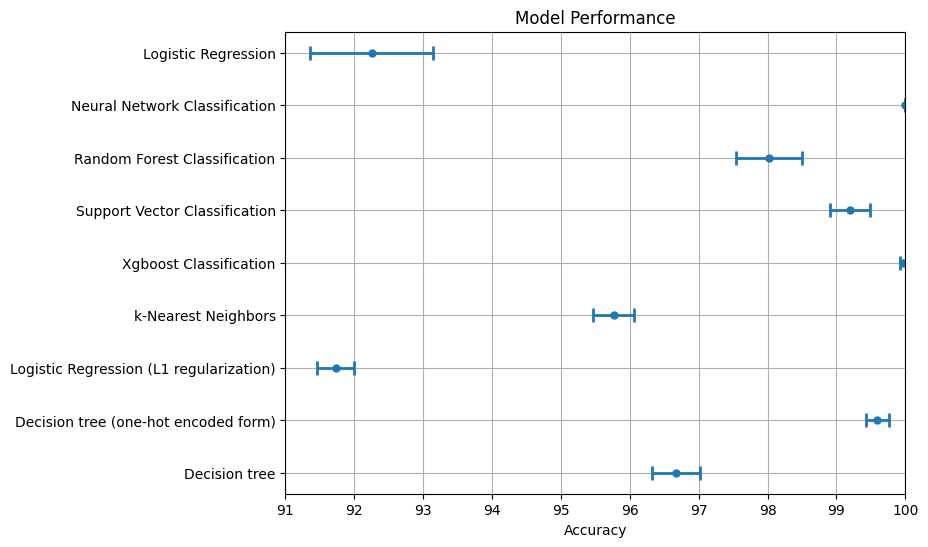

In [18]:

# Define the model names, means, and variances (standard deviations)
models = ['Decision tree','Decision tree (one-hot encoded form)','Logistic Regression (L1 regularization)','k-Nearest Neighbors','Xgboost Classification', 'Support Vector Classification','Random Forest Classification', 'Neural Network Classification','Logistic Regression']

mean_accuracies = list(mean_accuracy.values())
variances = list(variance_accuracy.values())

# Step 2: Calculate standard deviation (std = sqrt(variance))
std_devs = np.sqrt(variances)

# Step 3: Create the plot
plt.figure(figsize=(8, 6))
plt.errorbar(mean_accuracies, models, xerr=std_devs, fmt='o', capsize=5, capthick=2, markersize=5, elinewidth=2)

# Step 4: Add labels and title
plt.xlabel('Accuracy')
plt.title('Model Performance')
plt.xlim(91, 100)  # Adjust the x-axis limits as needed

# Step 5: Show the plot
plt.grid(True)
plt.show()


# TASK 2

## PART 1

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define bipolar_sigmoid function as a function of sigmoid function
def bipolar_sigmoid(x):
    return 2 * sigmoid(x) - 1

## PART 2

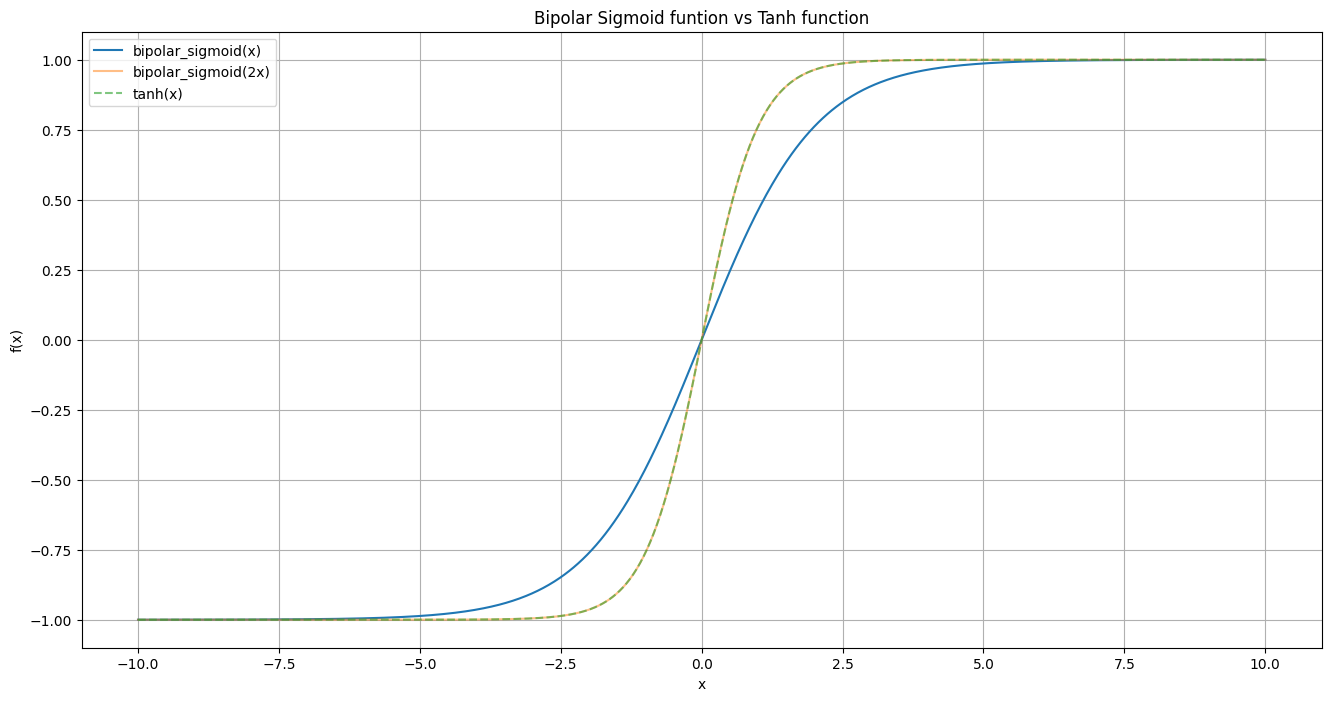

In [20]:
# Defining tanh function
def tanh_fn(x):
    return np.tanh(x)

# Create x values
x = np.linspace(-10, 10, 1000)

# Plotting tanh and bipolar_sigmoid
plt.figure(figsize=(16, 8))
plt.plot(x, bipolar_sigmoid(x), label=f'bipolar_sigmoid(x)')
plt.plot(x, bipolar_sigmoid(2*x), label=f'bipolar_sigmoid(2x)', alpha = 0.5)
plt.plot(x, tanh_fn(x), '--', label=f'tanh(x)', alpha=0.6)

plt.title('Bipolar Sigmoid funtion vs Tanh function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

From the graph above, we can see that tanh(x) is equivalent to bipolar_sigmoid(2*x)

## PART 3

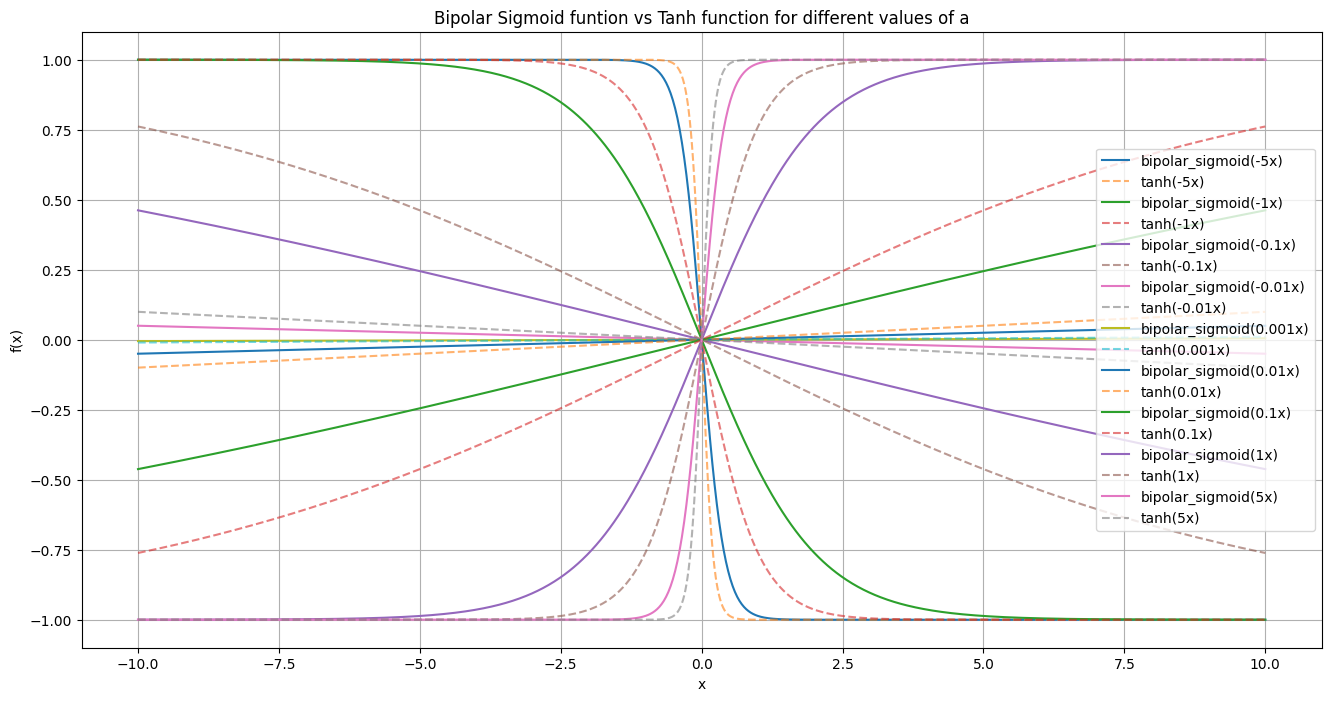

In [21]:
# Define parameter 'a' values
a_values = [-5, -1, -0.1, -0.01, 0.001, 0.01, 0.1, 1, 5]

# Plot bipolar_sigmoid(ax) and tanh(ax) for different values of a
plt.figure(figsize=(16, 8))

for a in a_values:  
    plt.plot(x, bipolar_sigmoid(a * x), label=f'bipolar_sigmoid({a}x)')
    plt.plot(x, tanh_fn(a * x), '--', label=f'tanh({a}x)', alpha=0.6)

plt.title('Bipolar Sigmoid funtion vs Tanh function for different values of a')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## PART 4

In [22]:
def linear_range(a,x):

    y = bipolar_sigmoid(a * x)

    # Define the threshold for linearity
    threshold = 0.05

    # Finding derivative of y
    dy_dx = np.gradient(y, x)

    # Find the index where x is closest to 0 as the function is clearly linear near x = 0
    x0_idx = np.abs(x).argmin()

    # Use the derivative at x = 0 as the reference
    dy_dx_ref = dy_dx[x0_idx]
    
    # Check for linearity based on deviations from the derivative at x = 0
    linear_idx = np.where(np.abs(dy_dx - dy_dx_ref) < threshold)[0]
    return linear_idx

x = np.linspace(-100, 100, 100000)

for a in a_values:
    linear_idx = linear_range(a, x)

    if len(linear_idx) > 0:
        print(f"Linear range for a = {a}: {x[linear_idx[0]]} to {x[linear_idx[-1]]}")   

Linear range for a = -5: -0.05500055000550219 to 0.05500055000548798
Linear range for a = -1: -0.6530065300653121 to 0.6530065300652979
Linear range for a = -0.1: -100.0 to 100.0
Linear range for a = -0.01: -100.0 to 100.0
Linear range for a = 0.001: -100.0 to 100.0
Linear range for a = 0.01: -100.0 to 100.0
Linear range for a = 0.1: -100.0 to 100.0
Linear range for a = 1: -0.6530065300653121 to 0.6530065300652979
Linear range for a = 5: -0.05500055000550219 to 0.05500055000548798


Clearly, we can see that for small 'a' values, the linearity range is high. Here I have considered x values to range from -100 to 100 so that it avoids arithmetic overflow. 